In [3]:
#Bailey Sanden HI 2454 sec1015
def read_line(line):
    sex = line[68]

    age_years = None
    if line[69] == '1':
        # years -> years
        age_years = int(line[70:74])
    elif line[69] == '2':
        # months -> years
        age_years = int(line[70:74]) / 12
    elif line[69] == '4':
        # days -> years
        age_years = int(line[70:74]) / 365
    
    elif line[69] == '5':
        # hours -> years
        age_years = int(line[70:74]) / 24 / 365
    
    elif line[69] == '6':
        # minutes -> years
        age_years = int(line[70:74]) / 60 / 24 / 365

    education_1989 = None
    education_2003 = None
    no_education_available = False
    if line[63] == '0':
        education_1989 = int(line[60:62])
    elif line[63] == '1':
        education_2003 = int(line[62])
    else:
        no_education_available = True
    married = line[83]
    icd_code = line[145:149].strip()
    return {
        'sex': sex, 
        'age_years': age_years,   
        'education_1989': education_1989, 
        'education_2003': education_2003, 
        'no_education_available': no_education_available, 
        'married': married, 
        'icd_code': icd_code
    }

    

In [4]:
import pandas as pd

with open('VS17MORT.DUSMCPUB') as input_file:
   lines = input_file.readlines()
   newLines = []
   for line in lines:
      newLines.append(read_line(line))

df = pd.DataFrame(newLines, columns = newLines[0].keys())

print(df)

        sex  age_years  education_1989  education_2003  \
0         M       71.0             NaN             4.0   
1         M       74.0             NaN             1.0   
2         M       59.0             NaN             4.0   
3         M       90.0             NaN             1.0   
4         M       66.0             NaN             5.0   
...      ..        ...             ...             ...   
2820029   F       85.0             NaN             3.0   
2820030   F       24.0             NaN             4.0   
2820031   F       83.0             NaN             1.0   
2820032   M       65.0             NaN             2.0   
2820033   M       60.0             NaN             9.0   

         no_education_available married icd_code  
0                         False       M      G20  
1                         False       D     M726  
2                         False       M     C159  
3                         False       M      C61  
4                         False       M     J449

In [5]:
import math
# male to female ratio
male_group_count= df[(df.sex == 'M')].count().sex 
print('Male group count: {}'.format(male_group_count))

female_group_count= df[(df.sex == 'F')].count().sex 
print('Female group count: {}'.format(female_group_count))

div = math.gcd(male_group_count, female_group_count)
print('{} to {} ratio male to females'.format(male_group_count/div, female_group_count/div))

Male group count: 1443614
Female group count: 1376420
721807.0 to 688210.0 ratio male to females


In [6]:
# age group number
age_group_0 = df[(df.age_years < 1)].count().age_years
print('age group 0: {}'.format(age_group_0))
age_group_1_10 = df[(df.age_years >= 1) & (df.age_years < 11)].count().age_years
print('age group 1-10: {}'.format(age_group_1_10))
age_group_11_20 = df[(df.age_years >= 11) & (df.age_years < 21)].count().age_years
print('age group 11-20: {}'.format(age_group_11_20))
age_group_21_30 = df[(df.age_years >= 21) & (df.age_years < 31)].count().age_years
print('age group 21-30: {}'.format(age_group_21_30))
age_group_31_40 = df[(df.age_years >= 31) & (df.age_years < 41)].count().age_years
print('age group 31-40: {}'.format(age_group_31_40))
age_group_41_50 = df[(df.age_years >= 41) & (df.age_years < 51)].count().age_years
print('age group 41-50: {}'.format(age_group_41_50))
age_group_51_60 = df[(df.age_years >= 51) & (df.age_years < 61)].count().age_years
print('age group 51-60: {}'.format(age_group_51_60))
age_group_61_70 = df[(df.age_years >= 61) & (df.age_years < 71)].count().age_years
print('age group 61-70: {}'.format(age_group_61_70))
age_group_71_80 = df[(df.age_years >= 71) & (df.age_years < 81)].count().age_years
print('age group 71-80: {}'.format(age_group_71_80))
age_group_81_90 = df[(df.age_years >= 81) & (df.age_years < 91)].count().age_years
print('age group 81-90: {}'.format(age_group_81_90))
age_group_91_100 = df[(df.age_years >= 91) & (df.age_years < 101)].count().age_years
print('age group 91-100: {}'.format(age_group_91_100))
age_group_100 = df[(df.age_years > 100)].count().age_years
print('age group > 100: {}'.format(age_group_100))

age group 0: 22413
age group 1-10: 6790
age group 11-20: 17246
age group 21-30: 51995
age group 31-40: 71382
age group 41-50: 117679
age group 51-60: 290322
age group 61-70: 480512
age group 71-80: 598206
age group 81-90: 748063
age group 91-100: 396007
age group > 100: 19107


In [7]:
#Number of people in each edcuation level
#1989
no_formal_group_count= df[(df.education_1989 == 0)]
print('No formal education group count 1989: {}'.format(no_formal_group_count.count().education_1989 ))

yrs_ele_group_count= df[(df.education_1989 <=8)& (df.education_1989 >=1 )]
print('Years of elementary school group count 1989: {}'.format(yrs_ele_group_count.count().education_1989 ))

oneyr_hs_group_count= df[(df.education_1989 == 9)]
print('1 year of High School group count 1989: {}'.format(oneyr_hs_group_count.count().education_1989 ))

twoyr_hs_group_count= df[(df.education_1989 == 10)]
print('2 years of High School group count 1989: {}'.format(twoyr_hs_group_count.count().education_1989 ))

threeyr_hs_group_count= df[(df.education_1989 == 11)]
print('3 years of High School group count 1989: {}'.format(threeyr_hs_group_count.count().education_1989 ))

fouryr_hs_group_count= df[(df.education_1989 == 12)]
print('4 years of High School group count 1989: {}'.format(fouryr_hs_group_count.count().education_1989 ))

oneyr_college_group_count= df[(df.education_1989 == 13)]
print('One year of College group count 1989: {}'.format(oneyr_college_group_count.count().education_1989 ))

twoyr_college_group_count= df[(df.education_1989 == 14)]
print('Two years of College group count 1989: {}'.format(twoyr_college_group_count.count().education_1989 ))

threeyr_college_group_count= df[(df.education_1989 == 15)]
print('Three years of College group count 1989: {}'.format(threeyr_college_group_count.count().education_1989 ))

fouryr_college_group_count= df[(df.education_1989 == 16)]
print('Four years of College group count 1989: {}'.format(fouryr_college_group_count.count().education_1989 ))

fiveyr_college_group_count= df[(df.education_1989 == 17)]
print('Five years of College or more group count 1989: {}'.format(fiveyr_college_group_count.count().education_1989 ))

not_stated= df[(df.education_1989 == 99)]
print('Not Stated group count 1989: {}'.format(not_stated.count().education_1989 ))



No formal education group count 1989: 151
Years of elementary school group count 1989: 1853
1 year of High School group count 1989: 553
2 years of High School group count 1989: 832
3 years of High School group count 1989: 658
4 years of High School group count 1989: 7482
One year of College group count 1989: 518
Two years of College group count 1989: 1126
Three years of College group count 1989: 152
Four years of College group count 1989: 870
Five years of College or more group count 1989: 557
Not Stated group count 1989: 202


In [8]:
#Number of people in each edcuation level
#2003
eight_or_less= df[(df.education_2003 == 1)]
print('8th Grade or less group count of 2003: {}'.format(eight_or_less.count().education_2003))

nine_tweleve_no_dip= df[(df.education_2003 == 2)]
print('9-12 grade, no diploma group count of 2003: {}'.format(nine_tweleve_no_dip.count().education_2003))

hs_grad_ged= df[(df.education_2003 == 3)]
print('High School Grad or GED group count of 2003: {}'.format(hs_grad_ged.count().education_2003))

some_college= df[(df.education_2003 == 4)]
print('Some College but no degree group count of 2003: {}'.format(some_college.count().education_2003))

associate_degree= df[(df.education_2003 == 5)]
print('Associate Degree group count of 2003: {}'.format(associate_degree.count().education_2003))

bach_degree= df[(df.education_2003 == 6)]
print('Bachelors Degree group count of 2003: {}'.format(bach_degree.count().education_2003))

master_degree= df[(df.education_2003 == 7)]
print('Masters Degree group count of 2003: {}'.format(master_degree.count().education_2003))

doc_degree= df[(df.education_2003 == 8)]
print('Doctorate or professional degree group count of 2003: {}'.format(doc_degree.count().education_2003))

unknown= df[(df.education_2003 == 9)]
print('Unknown group count of 2003: {}'.format(unknown.count().education_2003))



8th Grade or less group count of 2003: 286096
9-12 grade, no diploma group count of 2003: 292690
High School Grad or GED group count of 2003: 1185798
Some College but no degree group count of 2003: 349692
Associate Degree group count of 2003: 175036
Bachelors Degree group count of 2003: 294482
Masters Degree group count of 2003: 120442
Doctorate or professional degree group count of 2003: 50635
Unknown group count of 2003: 50209


In [9]:
#Number of people in each marital status
s_group_count= df[(df.married == 'S')]
print('Single, Never Married group count: {}'.format(s_group_count.count().married ))

m_group_count= df[(df.married == 'M')]
print('Married group count: {}'.format(m_group_count.count().married ))

w_group_count= df[(df.married == 'W')]
print('Widowed group count: {}'.format(w_group_count.count().married ))

d_group_count= df[(df.married == 'D')]
print('Divorced group count: {}'.format(d_group_count.count().married ))

u_group_count= df[(df.married == 'U')]
print('Marital Status Unknown group count: {}'.format(u_group_count.count().married ))


Single, Never Married group count: 386358
Married group count: 1029187
Widowed group count: 928550
Divorced group count: 454024
Marital Status Unknown group count: 21915


In [10]:
#get top 10 most frequent ICD10 codes 
n=10 
values = df['icd_code'].value_counts()[:n]
list_of_values = values.index.to_list()

with open('allvalid2009(detailed titles headings).txt') as input_file:
   lines = input_file.readlines()
   icd_codes_map = {}
   for idx, line in enumerate(lines):
        if idx >= 7:
            if len(line.strip().split('\t')) > 1:
                code = line.strip().split('\t')[0].replace('.', '')
                title = line.strip().split('\t')[1]
                icd_codes_map[code] = title

for code in list_of_values:
    print('Code: ', code, '\tCause of death: ', icd_codes_map[code])


Code:  I251 	Cause of death:  Atherosclerotic heart disease
Code:  C349 	Cause of death:  "Malignant neoplasm of bronchus or lung, unspecified"
Code:  J449 	Cause of death:  "Chronic obstructive pulmonary disease, unspecified"
Code:  G309 	Cause of death:  "Alzheimer's disease, unspecified"
Code:  I219 	Cause of death:  "Acute myocardial infarction, unspecified"
Code:  F03 	Cause of death:  Unspecified dementia
Code:  I500 	Cause of death:  Congestive heart failure
Code:  I250 	Cause of death:  "Atherosclerotic cardiovascular disease, so described"
Code:  I64 	Cause of death:  "Stroke, not specified as hemorrhage or infarction"
Code:  C259 	Cause of death:  "Malignant neoplasm of pancreas, unspecified"


In [21]:
# education vs death age relationship
# 2003
print('eight grade or less mean death age: ', eight_or_less.age_years.mean())

print('9th-12th, no dipoma mean death age: ', nine_tweleve_no_dip.age_years.mean())

print('High School Grad, GED mean death age: ', hs_grad_ged.age_years.mean())

print('Some College but no degree mean death age: ', some_college.age_years.mean())

print('Associate degree mean death age: ', associate_degree.age_years.mean())

print('Bachelors degree mean death age: ', bach_degree.age_years.mean())

print('Masters degree mean death age: ', master_degree.age_years.mean())

print('doc degree mean death age: ', doc_degree.age_years.mean())

print('Unknown mean death age: ', unknown.age_years.mean())

#1989
print('No formal education mean death age: ', no_formal_group_count.age_years.mean())

print('Years of elementary school mean death age: ', yrs_ele_group_count.age_years.mean())

print('1 year of High School  mean death age: ', oneyr_hs_group_count.age_years.mean())

print('2 years of High School  mean death age: ', twoyr_hs_group_count.age_years.mean())

print('3 years of High School  mean death age: ', threeyr_hs_group_count.age_years.mean())

print('4 years of High School  mean death age: ', fouryr_hs_group_count.age_years.mean())

print('One year of College mean death age: ', oneyr_college_group_count.age_years.mean())

print('Two years of College mean death age: ', twoyr_college_group_count.age_years.mean())

print('Three years of College mean death age: ', threeyr_college_group_count.age_years.mean())

print('Four years of College mean death age: ', fouryr_college_group_count.age_years.mean())

print('Five years of College or more mean death age: ', fiveyr_college_group_count.age_years.mean())

print('Not stated mean death age: ', not_stated.age_years.mean())


eight grade or less mean death age:  72.06825570378233
9th-12th, no dipoma mean death age:  70.55598756363388
High School Grad, GED mean death age:  73.85561150527035
Some College but no degree mean death age:  71.29540079670338
Associate degree mean death age:  71.86190840741334
Bachelors degree mean death age:  75.25035316490084
Masters degree mean death age:  76.4588674858851
doc degree mean death age:  78.6562456798657
Unknown mean death age:  67.57072118314292
No formal education mean death age:  20.397102800205634
Years of elementary school mean death age:  79.60226659471128
1 year of High School  mean death age:  71.01989150090417
2 years of High School  mean death age:  69.39663461538461
3 years of High School  mean death age:  69.35866261398176
4 years of High School  mean death age:  71.5308740978348
One year of College mean death age:  67.96138996138995
Two years of College mean death age:  69.82060390763766
Three years of College mean death age:  69.23684210526316
Four year

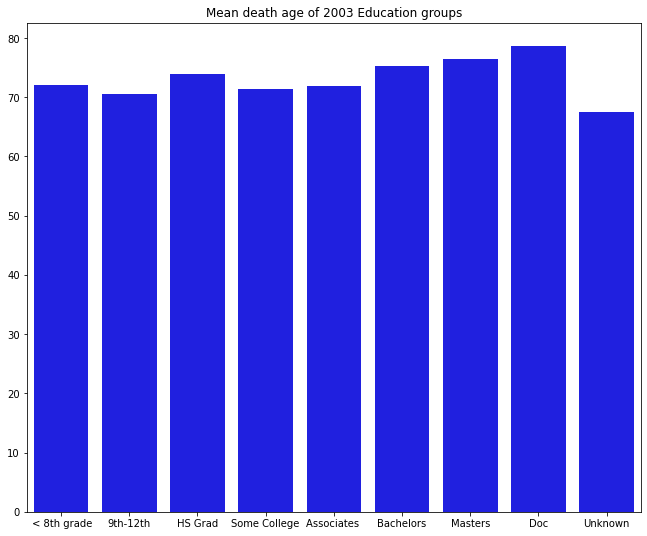

In [71]:
# education vs death age relationship visual
# 2003
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize= (11,9))
chart= sns.barplot(data=df, x=[' < 8th grade', '9th-12th', 'HS Grad', 'Some College' , 'Associates ', 'Bachelors', 'Masters', 'Doc', 'Unknown'], y=[eight_or_less.age_years.mean(), nine_tweleve_no_dip.age_years.mean(), hs_grad_ged.age_years.mean(), some_college.age_years.mean(), associate_degree.age_years.mean(), bach_degree.age_years.mean(), master_degree.age_years.mean(), doc_degree.age_years.mean(), unknown.age_years.mean()],color="Blue").set(title='Mean death age of 2003 Education groups')

#Although it is not a huge difference you can see the increase in age lived to as the education level increases 


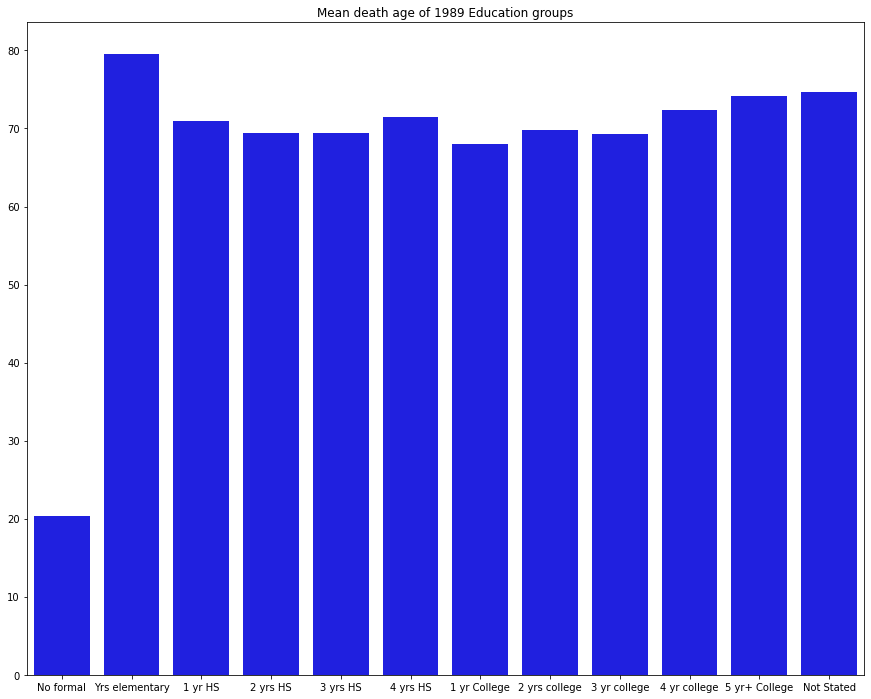

In [74]:
# education vs death age relationship visual
# 1989
plt.rcParams["figure.figsize"]=(15,12)
bchart= sns.barplot(data=df,x =['No formal','Yrs elementary', '1 yr HS', '2 yrs HS' , '3 yrs HS', '4 yrs HS', '1 yr College', '2 yrs college', '3 yr college','4 yr college', '5 yr+ College', 'Not Stated'], y=[no_formal_group_count.age_years.mean(), yrs_ele_group_count.age_years.mean(), oneyr_hs_group_count.age_years.mean(), twoyr_hs_group_count.age_years.mean(), threeyr_hs_group_count.age_years.mean(), fouryr_hs_group_count.age_years.mean(), oneyr_college_group_count.age_years.mean(), twoyr_college_group_count.age_years.mean(), threeyr_college_group_count.age_years.mean(),fouryr_college_group_count.age_years.mean(),fiveyr_college_group_count.age_years.mean(), not_stated.age_years.mean()],color="Blue").set(title='Mean death age of 1989 Education groups')
plt.show()

#This is showing those with no formal education have a younger age to pass away at for the mean. Past that the disrutbtion of death mean and education is quite equal other than yrs elemenary. This does not correlate with the likely belief that those with more education would live longer.



In [12]:
# marital status vs death age relationship
print('Single mean death age: ', s_group_count.age_years.mean())
print('Married mean death age: ', m_group_count.age_years.mean())
print('Widowed mean death age: ', w_group_count.age_years.mean())
print('Divorced mean death age: ', d_group_count.age_years.mean())
print('Unknown mean death age: ', u_group_count.age_years.mean())

Single mean death age:  50.92319152881642
Married mean death age:  72.37796813391606
Widowed mean death age:  85.43815815263864
Divorced mean death age:  68.74993502460255
Unknown mean death age:  66.62631165349235


[Text(0.5, 1.0, 'Mean death age of married groups')]

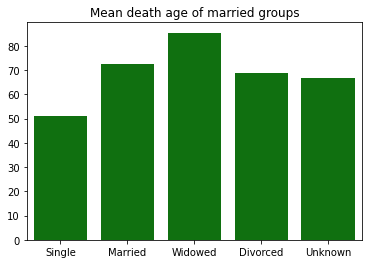

In [19]:
import numpy as np
import seaborn as sns
sns.barplot(data=df, x=['Single', 'Married', 'Widowed', 'Divorced', 'Unknown'], y=[s_group_count.age_years.mean(), m_group_count.age_years.mean(), w_group_count.age_years.mean(), d_group_count.age_years.mean(), u_group_count.age_years.mean()],color="green").set(title='Mean death age of married groups')

#This is showing single indivudals to have the shortest life. The original correlation intended to see was widowed individuals would have had a lower age average to pass away at. 